In [530]:
#conda install quandl

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Importing Labraries and data

In [532]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [575]:
# This command tells python to remember a main folder path
path = r'/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data'

In [577]:
# simplify the import function
data_cleaned = pd.read_csv(os.path.join(path, 'prepared.csv'), index_col = False)

In [579]:
# Set your API key
quandl.ApiConfig.api_key = '4GoFmF2sW8Jqz5CRBKLy'

In [581]:
# Import a relevant dataset from Quandl
# For demonstration purposes, we'll use the U.S. Population by State dataset
population_data = quandl.get("FRED/POP")

In [583]:
# Display the first few rows
data_cleaned.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,year
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,3.0,14.0,NaN,...,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.447132,20.47711,2013
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,43.0,NaN,...,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.000000,35.00000,2013
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1.0,3.0,9.0,0::Unknown||1::Unknown,...,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.000000,13.00000,2013
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,2.0,0.0,6.0,NaN,...,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.000000,28.00000,2013
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,6.0,0::Unknown||1::Unknown,...,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.000000,27.00000,2013


In [585]:
# Drop any unnecessary columns and handle missing values
#data_cleaned.drop(columns= ['latitude', 'incident_id', 'longitude'], inplace=True)
#data_cleaned.dropna(inplace=True)


# Check for duplicates
duplicates = data_cleaned.duplicated().sum()
print(f'Duplicates in data: {duplicates}')

Duplicates in data: 0


In [587]:
data_cleaned.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'year'],
      dtype='object')

In [589]:
data_cleaned.shape

(239677, 22)

In [591]:
type(data_cleaned)

pandas.core.frame.DataFrame

## Subsetting, wrangling, and cleaning time-series data

In [594]:
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], format='%Y-%m-%d')
data_cleaned.set_index('date', inplace = True)
data_new = data_cleaned['n_killed'].resample('M').sum()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


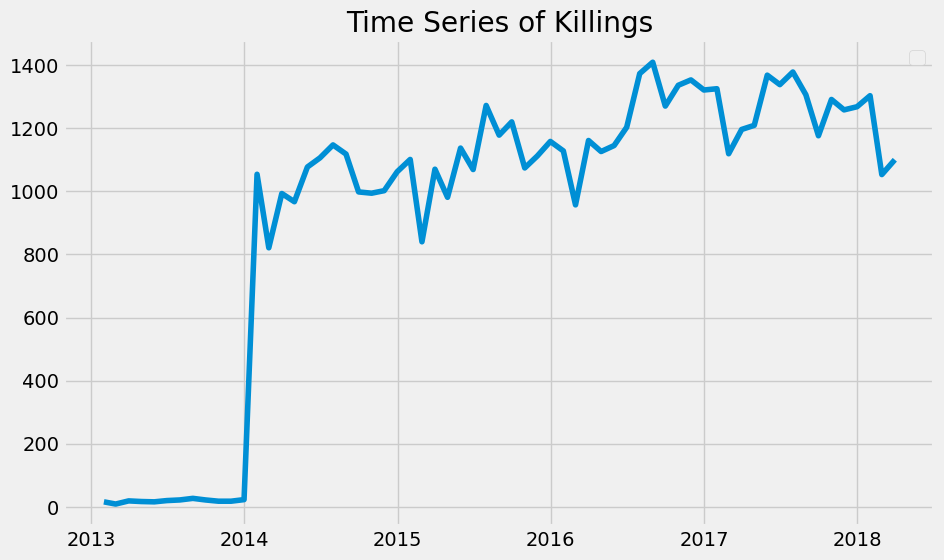

<Figure size 1800x700 with 0 Axes>

In [596]:
# Plot the data using matplotlib.

plt.figure(figsize=(10,6), dpi=100)     
plt.plot(data_new)
plt.title('Time Series of Killings')
plt.legend()
plt.show()
plt.savefig('/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data/linechart_nkilled.png')

## Time-series analysis:decomposition

In [599]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_new, model='additive', period=3)

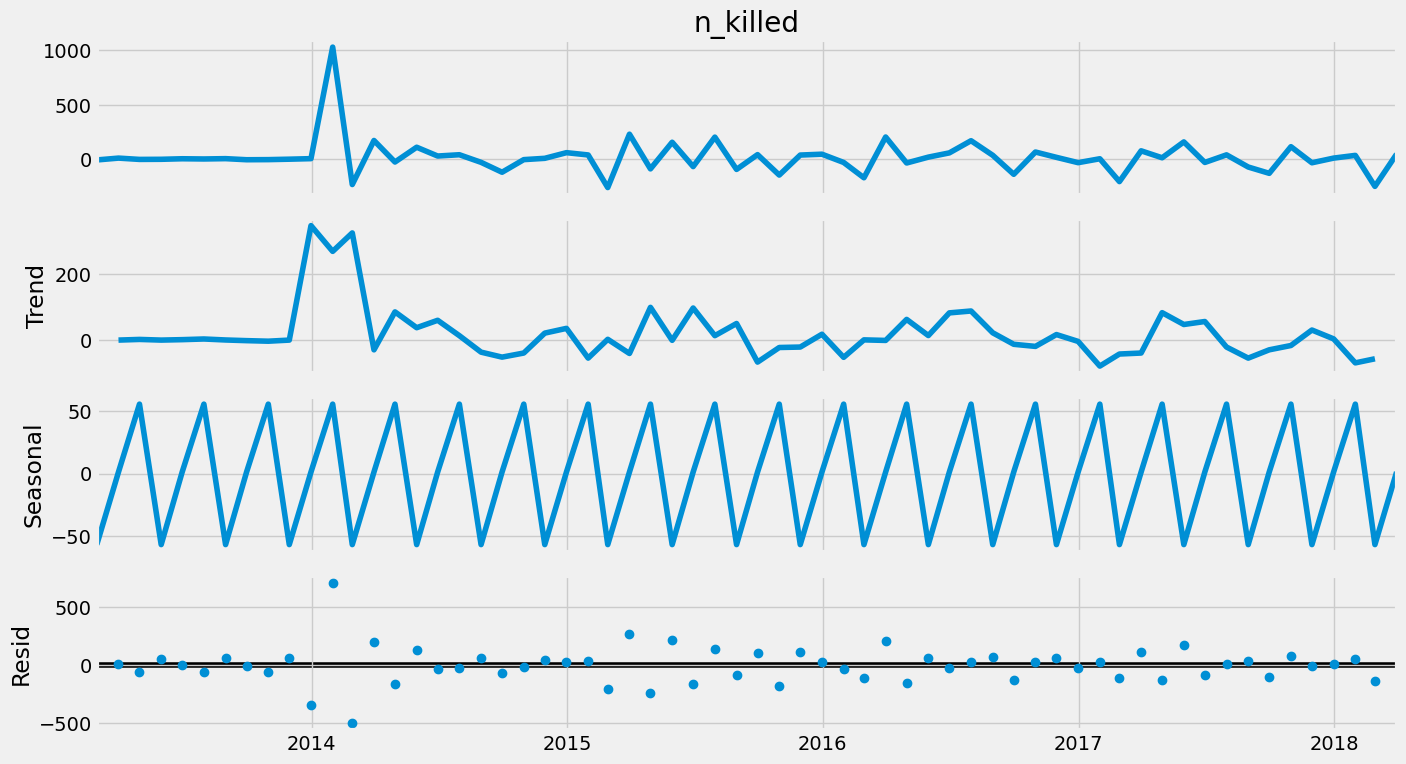

In [623]:
# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

## Testing for stationarity

In [603]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_new)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.088964
p-value                         0.248975
Number of Lags Used             1.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


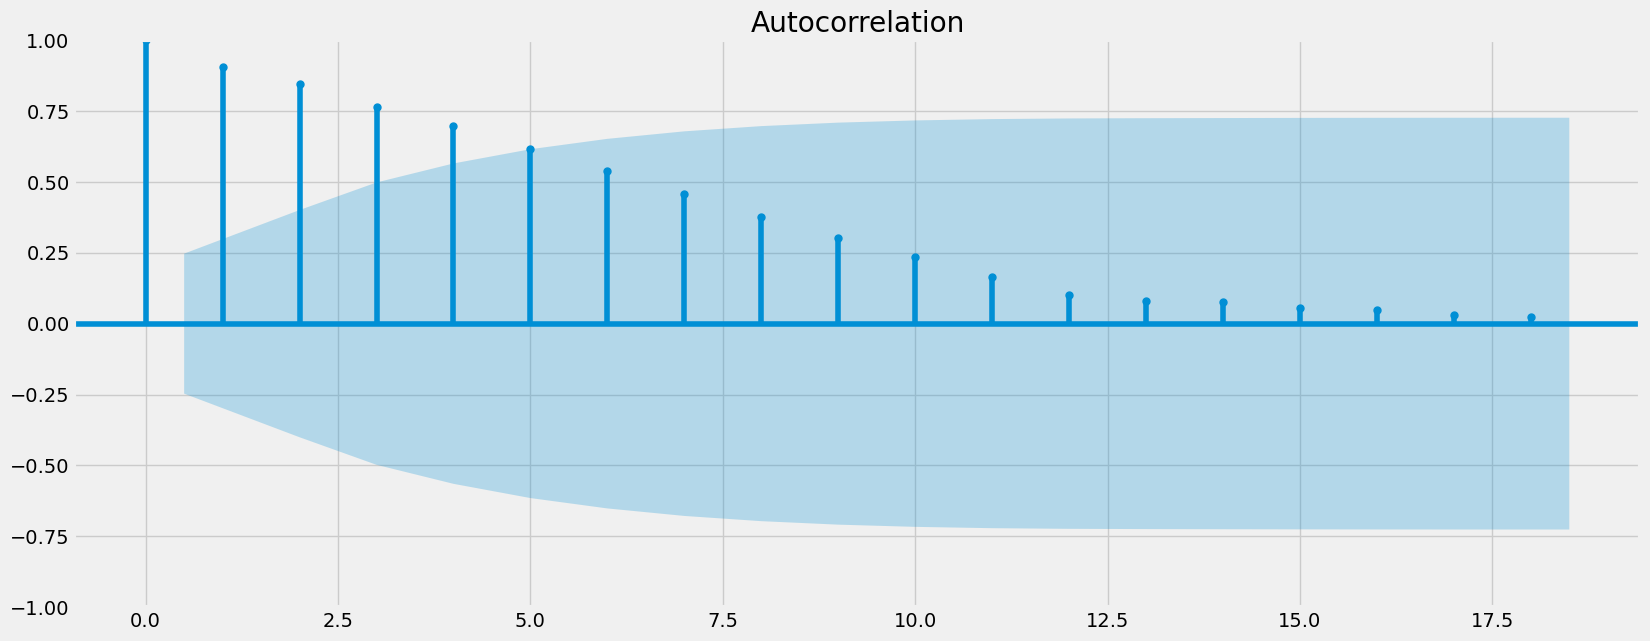

In [605]:
# Check out a plot of autocorrelations to confirm non-stationarity

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_new)
plt.show()

## Stationarizing the Gun Violence Data

## p-value > 0.5 and Test statistics > critical values -> data is not stationary. The data can be transformed to a stationary time series with the following methods:
### - Smoothing
### - Differenciation

### Smoothing

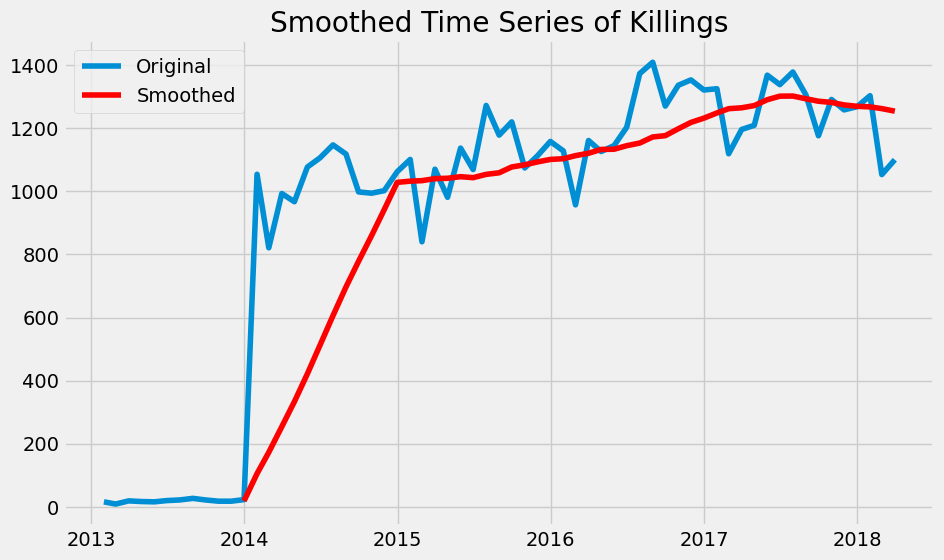

In [607]:
data_new_smoothed = data_new.rolling(window=12).mean()
plt.figure(figsize=(10, 6))
plt.plot(data_new, label='Original')
plt.plot(data_new_smoothed, color='red', label='Smoothed')
plt.title('Smoothed Time Series of Killings')
plt.legend()
plt.show()

## Observation:
### The plot visualizes the original time series data of killings and a smoothed version of the same data using a rolling mean with a window size of 12.

## 1. Original Data (Blue Line):

### - The blue line represents the original time series data, which shows the raw values of killings over time.
### - The data exhibits noticeable fluctuations, reflecting the variability and possibly the noise in the time series.

## 2. Smoothed Data (Red Line):

### - The red line represents the smoothed time series data, obtained by applying a rolling mean with a window size of 12.
### - The smoothed line smooths out short-term fluctuations and highlights longer-term trends in the data.
### - The peaks and troughs are less pronounced, providing a clearer view of the underlying pattern and trends.

## Conclusion:
### The smoothed time series helps in identifying the overall trend and cyclical patterns in the data by reducing the noise and short-term fluctuations. This can be particularly useful for gaining insights into long-term movements and making more accurate forecasts or decisions based on the data.

In [609]:
# Perform the Dickey-Fuller test on the smoothed series
dickey_fuller(data_new_smoothed.dropna())

Dickey-Fuller Stationarity test:
Test Statistic                 -3.207070
p-value                         0.019579
Number of Lags Used             1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


## p-value < 0.5 and Test statistics < critical values -> data is stationary.

### Differenciation

In [630]:
data_new_diff = data_new - data_new.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [632]:
data_new_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [634]:
data_diff.head()

,n_killed
datetime,
2015-01-02,3.0
2015-01-03,-5.0
2015-01-04,6.0
2015-01-05,-6.0
2015-01-06,0.0


In [636]:
data_diff.columns

Index(['n_killed'], dtype='object')

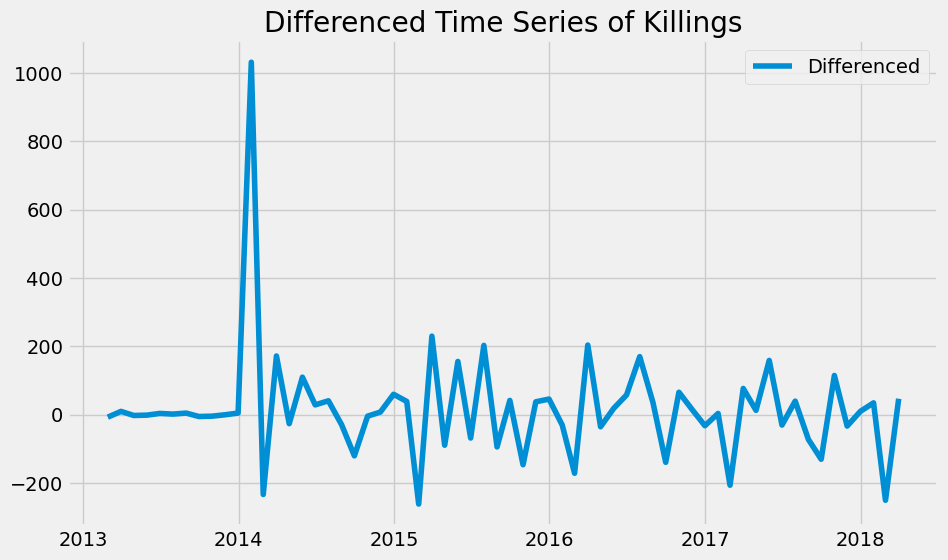

In [613]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(10,6))
plt.plot(data_new_diff, label='Differenced')
plt.title('Differenced Time Series of Killings')
plt.legend()
plt.show()

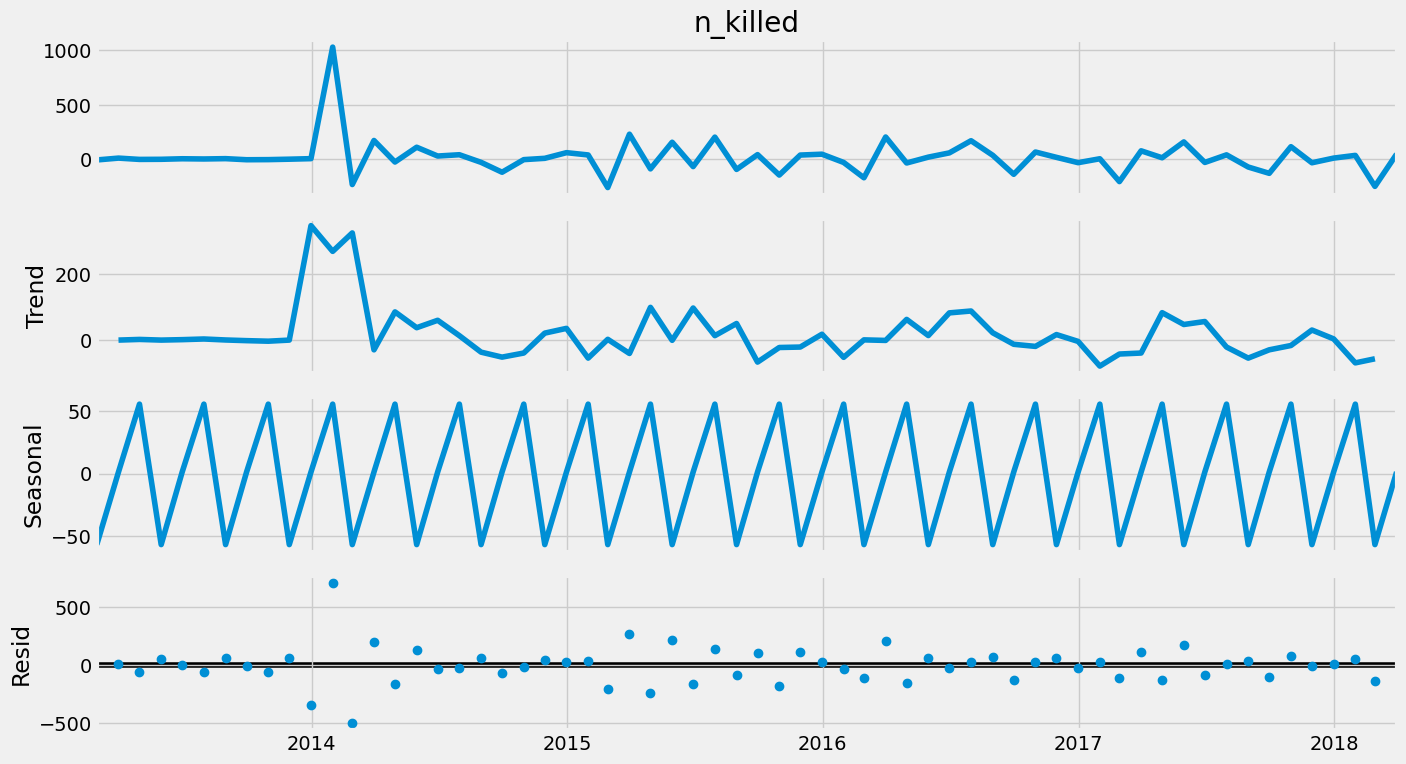

In [615]:
# Decompose the differenced time series
decomposition = sm.tsa.seasonal_decompose(data_new_diff, model='additive', period=3)

# Plot the decomposed components of the differenced time series
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

## Conclusion:
### The decomposition of the differenced time series helps isolate the various components contributing to the observed variability. By examining the trend, seasonal, and residual components separately, we can gain a clearer understanding of the underlying patterns in the data. This decomposition is particularly useful for further time series analysis, such as forecasting or anomaly detection, as it allows us to model each component individually. The trend and seasonal components reveal the systematic structure in the data, while the residual component provides insights into the remaining unexplained variability.

In [617]:
dickey_fuller(data_new_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.066178e+01
p-value                        4.388308e-19
Number of Lags Used            0.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


## p-value < 0.5 and Test statistics < critical values -> data is stationary.

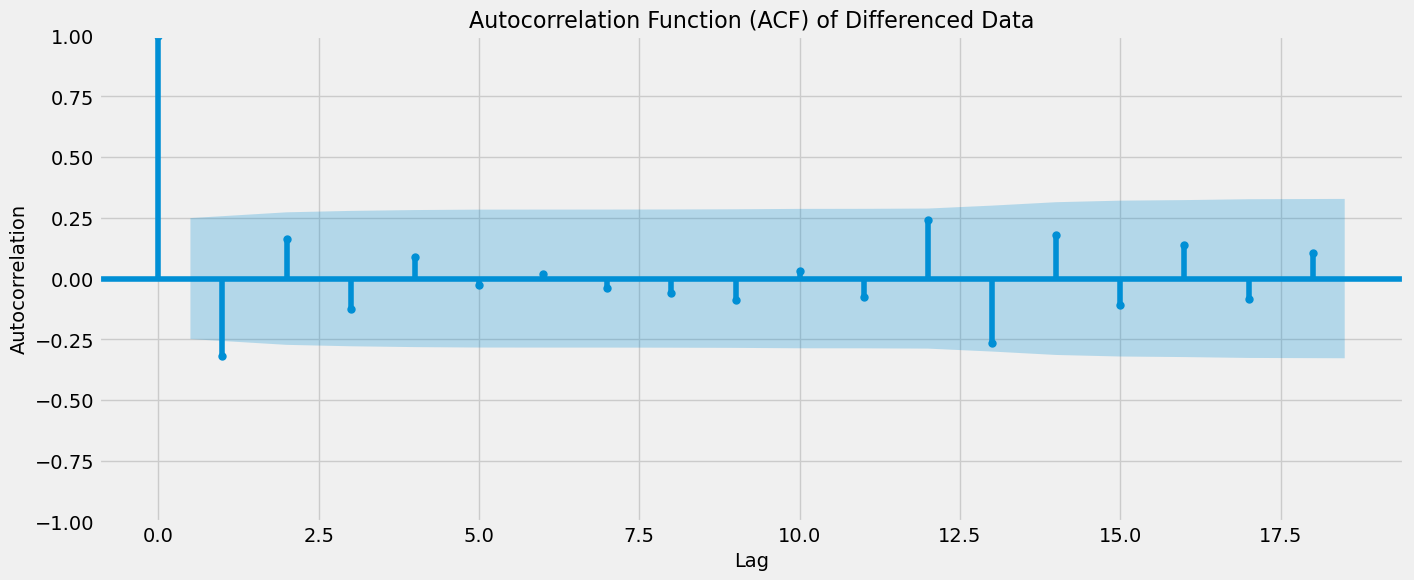

In [619]:
# Plot the Autocorrelation Function (ACF) with adjusted figure size
plt.figure(figsize=(15, 6))
plot_acf(data_new_diff, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Differenced Data', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()

## Conclusion:
### he ACF (Autocorrelation Function) plot of the differenced data helps to confirm that the differencing process has effectively reduced or removed the non-stationarity in the original series. Significant autocorrelations at lower lags might indicate some remaining structure or patterns in the data that could be modeled using autoregressive components. The absence of significant autocorrelations at higher lags suggests that the series is now more stationary and suitable for further modeling and analysis.